In [1]:
import pandas as pd

# Cargar el archivo CSV desde la URL
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

# Mostrar las primeras filas del DataFrame para ver cómo se ve
print(df.head())

# Ver las columnas del DataFrame
print(df.columns)


   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

# Pregunta 1
Muestre los tipos de datos de cada columna utilizando el atributo dtypes, luego haga una captura de pantalla y envíela. Incluya su código en la imagen.

In [2]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Pregunta 2
Elimine las columnas "id" y "Sin nombre: 0" del eje 1 utilizando el método drop() y, a continuación, utilice el método describe() para obtener un resumen estadístico de los datos. Asegúrese de que el parámetro inplace está en True. Haga una captura de pantalla y envíela. 

In [3]:
# Eliminar las columnas 'id' y 'Sin nombre: 0' del eje 1 (columnas)
df.drop(['id', 'Sin nombre: 0'], axis=1, inplace=True, errors='ignore')

# Obtener el resumen estadístico de los datos
print(df.describe())

        Unnamed: 0         price      bedrooms     bathrooms   sqft_living  \
count  21613.00000  2.161300e+04  21600.000000  21603.000000  21613.000000   
mean   10806.00000  5.400881e+05      3.372870      2.115736   2079.899736   
std     6239.28002  3.671272e+05      0.926657      0.768996    918.440897   
min        0.00000  7.500000e+04      1.000000      0.500000    290.000000   
25%     5403.00000  3.219500e+05      3.000000      1.750000   1427.000000   
50%    10806.00000  4.500000e+05      3.000000      2.250000   1910.000000   
75%    16209.00000  6.450000e+05      4.000000      2.500000   2550.000000   
max    21612.00000  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.76631

# Pregunta 3
Utilice el método value_counts para contar el número de casas con valores de suelo únicos, y utilice el método to_frame() para convertirlo en un marco de datos. Haga una captura de pantalla de su código y de la salida y envíela.

In [4]:
# Contar el número de casas con valores de suelo únicos
value_counts = df['sqft_lot'].value_counts()

# Convertir los resultados a un marco de datos
value_counts_df = value_counts.to_frame()

# Mostrar el resultado
print(value_counts_df)

          count
sqft_lot       
5000        358
6000        290
4000        251
7200        220
4800        120
...         ...
2642          1
2656          1
15035         1
638           1
13405         1

[9782 rows x 1 columns]


# Pregunta 4
Utilice la función boxplot de la biblioteca seaborn para elaborar un gráfico que le ayude a determinar si las casas con vistas al mar o sin vistas al mar tienen más precios atípicos. Haga una captura de pantalla de su código y boxplot y envíela.

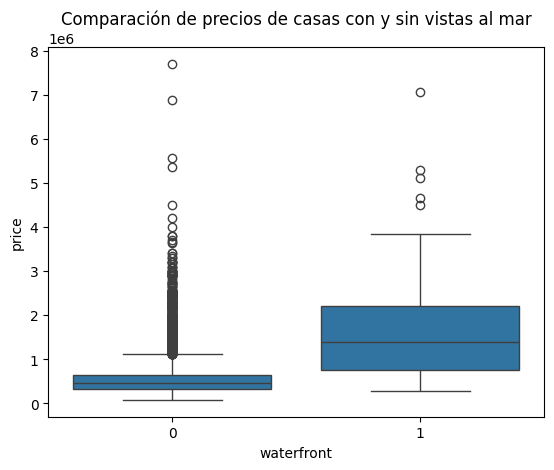

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot para comparar precios de casas con o sin vistas al mar
sns.boxplot(x='waterfront', y='price', data=df)

# Configurar el título del gráfico
plt.title('Comparación de precios de casas con y sin vistas al mar')

# Mostrar el gráfico
plt.show()


# Pregunta 5
Utilice la función regplot de la biblioteca seaborn para determinar si la característica sqft_above está correlacionada negativa o positivamente con el precio. Haga una captura de pantalla del gráfico y del código utilizado para generarlo. Envíe su captura de pantalla.

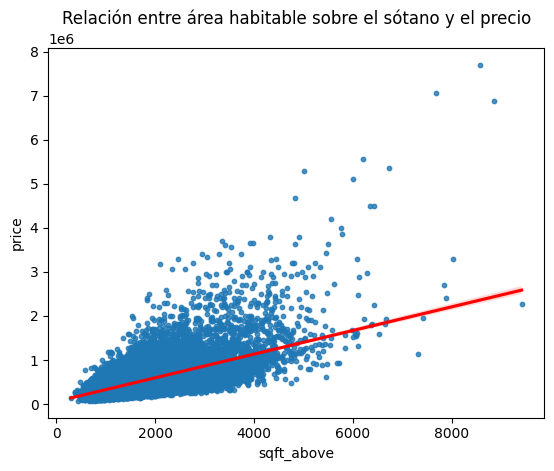

In [6]:
# Crear el gráfico de regresión entre 'sqft_above' y 'price'
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Configurar el título del gráfico
plt.title('Relación entre área habitable sobre el sótano y el precio')

# Mostrar el gráfico
plt.show()

# Pregunta 6
Ajuste un modelo de regresión lineal para predecir el precio utilizando la característica 'sqft_living', luego calcule el R^2. Haga una captura de pantalla de su código y del valor del R^2. Envíe la captura de pantalla.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Seleccionar las variables independientes y dependientes
X = df[['sqft_living']]  # Característica (sqft_living)
y = df['price']  # Variable dependiente (precio)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el valor de R^2
r2 = r2_score(y_test, y_pred)

# Mostrar el valor de R^2
print(f'R^2: {r2}')


R^2: 0.49406905389089006


# Pregunta 7
Ajuste un modelo de regresión lineal para predecir el "precio" utilizando la lista de características:

"pisos"
"frente al mar"
"lat"
"dormitorios"
"sqft_basement"
"vista"
"baños"
"sqft_living15"
"sqft_above"
"grado"
"sqft_living"

Haga una captura de pantalla de su código y del valor R^2 y súbala.

In [8]:
# Definir las características que se usarán
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Eliminar filas con valores NaN en las columnas de las características
df_clean = df.dropna(subset=features)

# Recalcular X e y
X = df_clean[features]
y = df_clean['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones y calcular R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Mostrar el valor de R^2
print(f'R^2: {r2}')

R^2: 0.6568060668488771


# Pregunta 8
Cree un objeto pipeline que escale los datos, realice una transformación polinómica y ajuste un modelo de regresión lineal. Ajuste el objeto utilizando las características de la pregunta anterior, luego ajuste el modelo y calcule el R^2. Haga una captura de pantalla de su código y del R^2 y súbala.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Definir las características que se usarán
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Eliminar filas con valores NaN en las columnas de las características
df_clean = df.dropna(subset=features)

# Recalcular X e y
X = df_clean[features]
y = df_clean['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Paso 1: Escalar los datos
    ('poly', PolynomialFeatures(degree=2)),      # Paso 2: Transformación polinómica de grado 2
    ('model', LinearRegression())                # Paso 3: Modelo de regresión lineal
])

# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar el valor de R^2
print(f'R^2: {r2}')


R^2: 0.7138681972921543


# Pregunta 9
Cree y ajuste un objeto de regresión Ridge utilizando los datos de entrenamiento, estableciendo el parámetro de regularización en 0,1, y calcule la R^2 utilizando los datos de prueba. Haga una captura de pantalla de su código y del R^2 y súbala.

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Definir las características que se usarán
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Eliminar filas con valores NaN en las columnas de las características
df_clean = df.dropna(subset=features)

# Recalcular X e y
X = df_clean[features]
y = df_clean['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo Ridge con un parámetro de regularización alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar el valor de R^2
print(f'R^2: {r2}')

R^2: 0.6568035759606471


# Pregunta 10
Realice una transformación polinómica de segundo orden tanto en los datos de entrenamiento como en los de prueba. Cree y ajuste un objeto de regresión de Ridge utilizando los datos de entrenamiento, estableciendo el parámetro de regularización en 0,1. Calcule el R^2 utilizando los datos de prueba proporcionados. Haga una captura de pantalla de su código y del R^2 y súbala.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Definir las características que se usarán
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Eliminar filas con valores NaN en las columnas de las características
df_clean = df.dropna(subset=features)

# Recalcular X e y
X = df_clean[features]
y = df_clean['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una transformación polinómica de segundo orden
poly = PolynomialFeatures(degree=2)

# Ajustar y transformar los datos de entrenamiento
X_train_poly = poly.fit_transform(X_train)

# Transformar los datos de prueba
X_test_poly = poly.transform(X_test)

# Crear y ajustar el modelo Ridge con un parámetro de regularización alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test_poly)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar el valor de R^2
print(f'R^2: {r2}')

R^2: 0.6905981083130411
